In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from scipy.ndimage import uniform_filter, median_filter

In [ ]:
def plt_hist(noise, title='Noise Histogram', bins=None):
    plt.grid()
    plt.hist(noise.ravel(), bins=bins, alpha=0.5, color='green')
    plt.tick_params(labelsize=15)
    plt.title(title, size=25)

In [ ]:
def plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noise, noise_type):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    ax = axes.ravel()

    ax[0].imshow(original_img, cmap='gray')
    ax[0].set_title('Original', size=20)
    ax[0].axis('off')

    ax[1].imshow(noisy_img, cmap='gray')
    ax[1].set_title(f'Noisy ({noise_type})', size=20)
    ax[1].axis('off')

    ax[2].imshow(denoised_mean_img, cmap='gray')
    ax[2].set_title('Denoised (Mean)', size=20)
    ax[2].axis('off')

    ax[3].imshow(denoised_median_img, cmap='gray')
    ax[3].set_title('Denoised (Median)', size=20)
    ax[3].axis('off')

    plt.figure()
    plt_hist(noise, title=f'{noise_type} Noise Histogram')
    plt.show()

    print(f"PSNR (Original vs Noisy): {compare_psnr(original_img, noisy_img):.3f}")
    print(f"PSNR (Original vs Denoised Mean): {compare_psnr(original_img, denoised_mean_img):.3f}")
    print(f"PSNR (Original vs Denoised Median): {compare_psnr(original_img, denoised_median_img):.3f}")

In [ ]:
image_path = '/content/lena.png'

In [ ]:
original_img = rgb2gray(imread(image_path))

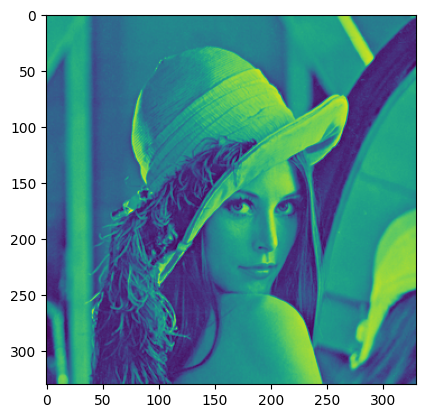

In [ ]:
plt.imshow(original_img)

In [ ]:
noisy_img = random_noise(original_img, mode='gaussian', var=0.02)

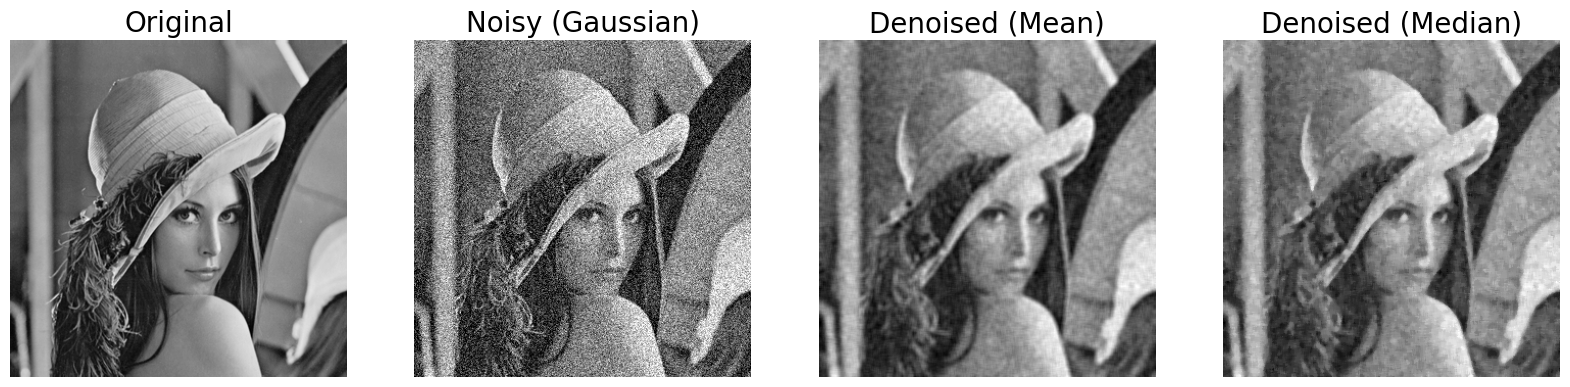

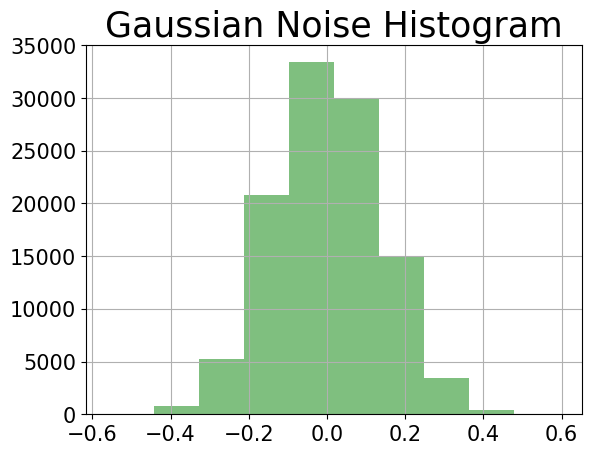

PSNR (Original vs Noisy): 17.250
PSNR (Original vs Denoised Mean): 25.511
PSNR (Original vs Denoised Median): 25.298


In [ ]:
denoised_mean_img = uniform_filter(noisy_img, size=5)
denoised_median_img = median_filter(noisy_img, size=5)
plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noisy_img-original_img, 'Gaussian')


In [ ]:
noisy_img = random_noise(original_img, mode='s&p', amount=0.05)

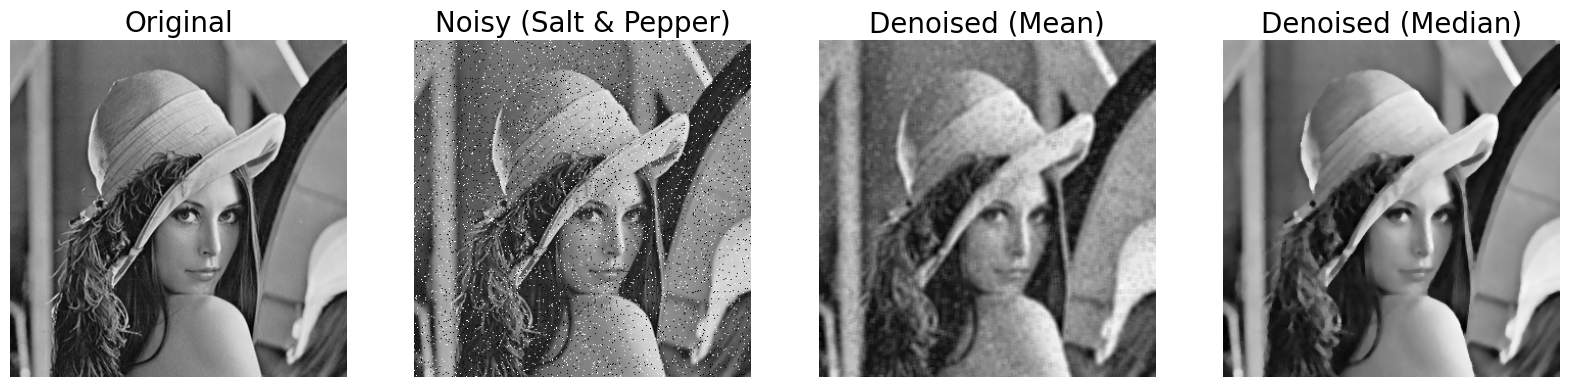

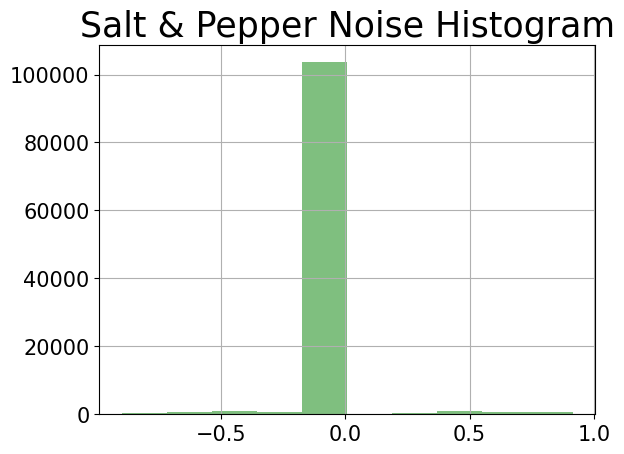

PSNR (Original vs Noisy): 18.302
PSNR (Original vs Denoised Mean): 25.539
PSNR (Original vs Denoised Median): 28.595


In [ ]:
denoised_mean_img = uniform_filter(noisy_img, size=5)
denoised_median_img = median_filter(noisy_img, size=5)
plt_images(original_img, noisy_img, denoised_mean_img, denoised_median_img, noisy_img-original_img, 'Salt & Pepper')


Modern Image Enhancement - Autoencodr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from sklearn.datasets import fetch_lfw_people
import os


In [ ]:
def to_img(x):
    return x.view(x.size(0), 1, 50, 37)

def plot_sample_img(img, name, title='Sample Image'):
    img = img.view(50, 37)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.savefig(f'{name}.png')
    plt.show()

def add_noise(img, noise_level=0.2):
    noise = torch.randn_like(img) * noise_level
    return img + noise


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
# Fetch the dataset, normalize, and create DataLoader
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
images = lfw_people.images / 255.0  # Normalize images to [0, 1]
images = images[:, np.newaxis, :, :]  # Add channel dimension
dataset = torch.utils.data.TensorDataset(torch.tensor(images, dtype=torch.float32))
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(50 * 37, 512),
            nn.ReLU(True),
            nn.Linear(512, 128),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(128, 512),
            nn.ReLU(True),
            nn.Linear(512, 50 * 37),
            nn.Sigmoid())  # Sigmoid to ensure output is between 0 and 1

    def forward(self, x):
        x = x.view(-1, 50 * 37)
        x = self.encoder(x)
        x = self.decoder(x)
        return x.view(-1, 1, 50, 37)


In [ ]:
model = Autoencoder()

Epoch 1/100, Loss: 0.018390366807579994
Epoch 2/100, Loss: 0.0149058997631073
Epoch 3/100, Loss: 0.019754203036427498
Epoch 4/100, Loss: 0.03350835293531418
Epoch 5/100, Loss: 0.016350487247109413
Epoch 6/100, Loss: 0.01659340038895607
Epoch 7/100, Loss: 0.01549513265490532
Epoch 8/100, Loss: 0.00879373773932457
Epoch 9/100, Loss: 0.012100276537239552
Epoch 10/100, Loss: 0.016521455720067024


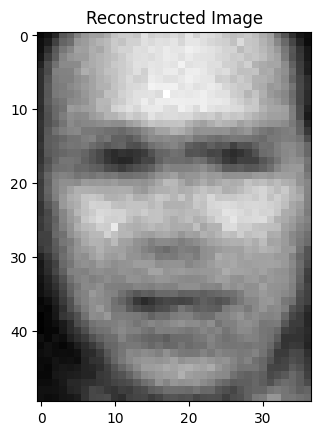

Epoch 11/100, Loss: 0.015354917384684086
Epoch 12/100, Loss: 0.011889825575053692
Epoch 13/100, Loss: 0.013170894235372543
Epoch 14/100, Loss: 0.0127743910998106
Epoch 15/100, Loss: 0.01599050499498844
Epoch 16/100, Loss: 0.012218799442052841
Epoch 17/100, Loss: 0.015257542952895164
Epoch 18/100, Loss: 0.015104508027434349
Epoch 19/100, Loss: 0.013373598456382751
Epoch 20/100, Loss: 0.016571352258324623


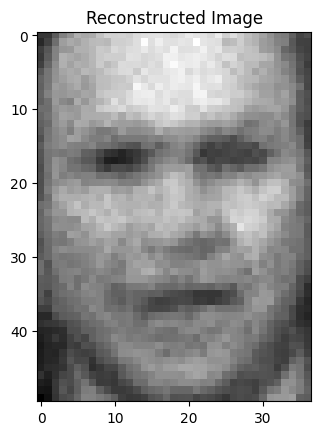

Epoch 21/100, Loss: 0.01703553833067417
Epoch 22/100, Loss: 0.014029309153556824
Epoch 23/100, Loss: 0.013172300532460213
Epoch 24/100, Loss: 0.01601158082485199
Epoch 25/100, Loss: 0.015142656862735748
Epoch 26/100, Loss: 0.014929142780601978
Epoch 27/100, Loss: 0.016541527584195137
Epoch 28/100, Loss: 0.013433687388896942
Epoch 29/100, Loss: 0.013963327743113041
Epoch 30/100, Loss: 0.01708943024277687


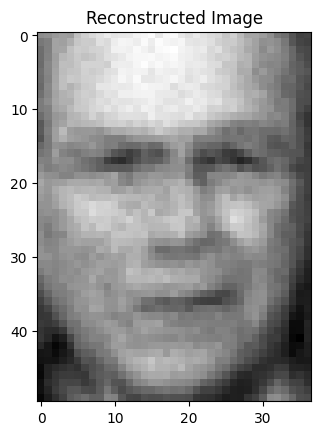

Epoch 31/100, Loss: 0.014278617687523365
Epoch 32/100, Loss: 0.013843998312950134
Epoch 33/100, Loss: 0.01561529841274023
Epoch 34/100, Loss: 0.013600115664303303
Epoch 35/100, Loss: 0.013137595728039742
Epoch 36/100, Loss: 0.013458224013447762
Epoch 37/100, Loss: 0.014702796004712582
Epoch 38/100, Loss: 0.011798671446740627
Epoch 39/100, Loss: 0.014270845800638199
Epoch 40/100, Loss: 0.013679332099854946


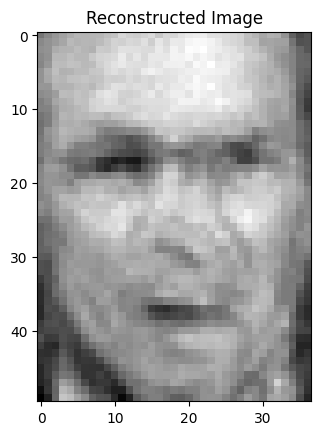

Epoch 41/100, Loss: 0.012744555249810219
Epoch 42/100, Loss: 0.014084439724683762
Epoch 43/100, Loss: 0.015109325759112835
Epoch 44/100, Loss: 0.013318796642124653
Epoch 45/100, Loss: 0.013843966647982597
Epoch 46/100, Loss: 0.01361390482634306
Epoch 47/100, Loss: 0.012530758045613766
Epoch 48/100, Loss: 0.013911914080381393
Epoch 49/100, Loss: 0.016488704830408096
Epoch 50/100, Loss: 0.01567808911204338


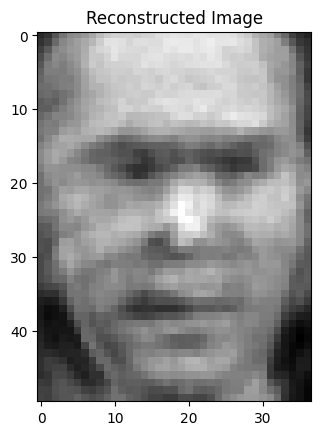

Epoch 51/100, Loss: 0.016056744381785393
Epoch 52/100, Loss: 0.015156646259129047
Epoch 53/100, Loss: 0.015846291556954384
Epoch 54/100, Loss: 0.010952564887702465
Epoch 55/100, Loss: 0.01377694308757782
Epoch 56/100, Loss: 0.014352184720337391
Epoch 57/100, Loss: 0.013172672130167484
Epoch 58/100, Loss: 0.012920575216412544
Epoch 59/100, Loss: 0.015631938353180885
Epoch 60/100, Loss: 0.014157113619148731


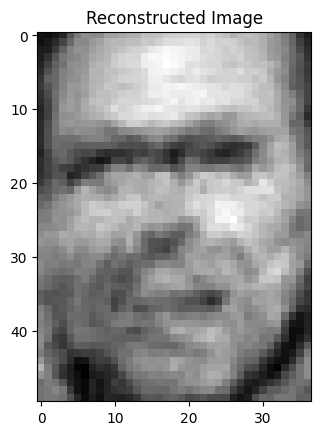

Epoch 61/100, Loss: 0.016002364456653595
Epoch 62/100, Loss: 0.015099633485078812
Epoch 63/100, Loss: 0.012352719902992249
Epoch 64/100, Loss: 0.015219108201563358
Epoch 65/100, Loss: 0.013848928734660149
Epoch 66/100, Loss: 0.016458002850413322
Epoch 67/100, Loss: 0.013121122494339943
Epoch 68/100, Loss: 0.01415740791708231
Epoch 69/100, Loss: 0.014060605317354202
Epoch 70/100, Loss: 0.01410909928381443


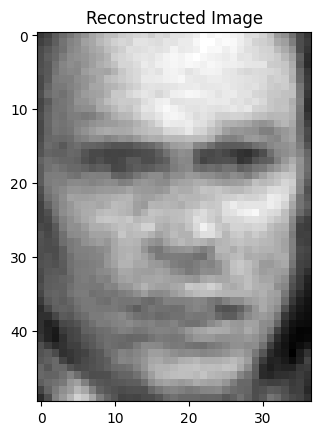

Epoch 71/100, Loss: 0.014312965795397758
Epoch 72/100, Loss: 0.01376515906304121
Epoch 73/100, Loss: 0.016172589734196663
Epoch 74/100, Loss: 0.013317301869392395
Epoch 75/100, Loss: 0.016603657975792885
Epoch 76/100, Loss: 0.015246165916323662
Epoch 77/100, Loss: 0.013176796026527882
Epoch 78/100, Loss: 0.013519875705242157
Epoch 79/100, Loss: 0.013377228751778603
Epoch 80/100, Loss: 0.015396460890769958


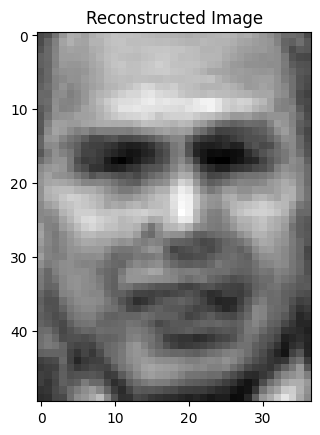

Epoch 81/100, Loss: 0.017183879390358925
Epoch 82/100, Loss: 0.013542326167225838
Epoch 83/100, Loss: 0.015803446993231773
Epoch 84/100, Loss: 0.013821253553032875
Epoch 85/100, Loss: 0.01154281571507454
Epoch 86/100, Loss: 0.018561044707894325
Epoch 87/100, Loss: 0.015015531331300735
Epoch 88/100, Loss: 0.014428889378905296
Epoch 89/100, Loss: 0.013586528599262238
Epoch 90/100, Loss: 0.015102199278771877


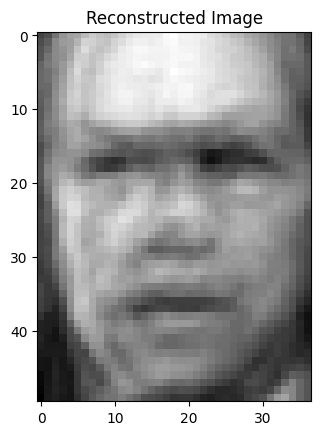

Epoch 91/100, Loss: 0.015159913338720798
Epoch 92/100, Loss: 0.01405401062220335
Epoch 93/100, Loss: 0.014666525647044182
Epoch 94/100, Loss: 0.015135502442717552
Epoch 95/100, Loss: 0.01432280708104372
Epoch 96/100, Loss: 0.01411654893308878
Epoch 97/100, Loss: 0.011848023161292076
Epoch 98/100, Loss: 0.014231047593057156
Epoch 99/100, Loss: 0.01213828008621931
Epoch 100/100, Loss: 0.013170930556952953


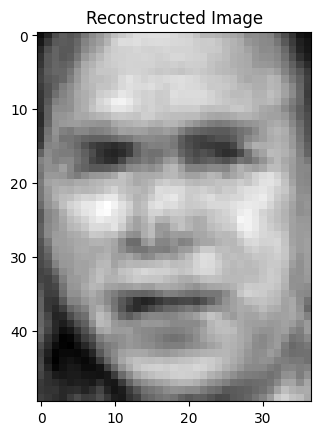

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1, 101):  # Train for 100 epochs
    for data, in dataloader:
        img = data[0]
        noisy_img = add_noise(img)
        optimizer.zero_grad()
        outputs = model(noisy_img)
        outputs = outputs.squeeze(1)  # Removes the 1-dimension at index 1

        loss = criterion(outputs, img)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch}/{100}, Loss: {loss.item()}')
    if epoch % 10 == 0:
        sample = outputs[0]
        plot_sample_img(sample.detach(), f'epoch_{epoch}', 'Reconstructed Image')


histogram equalization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import exposure
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import exposure
import matplotlib.pyplot as plt

In [ ]:
def plot_image_and_hist(image, axes, bins=256):
    """Plot an image and its histogram on given axes."""
    axes[0].imshow(image, cmap=plt.cm.gray)
    axes[0].axis('off')

    hist, bins = np.histogram(image.flatten(), bins=bins, range=[0, bins])
    cdf = hist.cumsum()  # Cumulative distribution function
    cdf_normalized = cdf * hist.max() / cdf.max()

    axes[1].plot(cdf_normalized, color='b')
    axes[1].hist(image.flatten(), bins=bins, color='r')
    axes[1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    axes[1].set_xlabel('Pixel intensity')
    axes[1].legend(('CDF', 'Histogram'), loc='upper left')


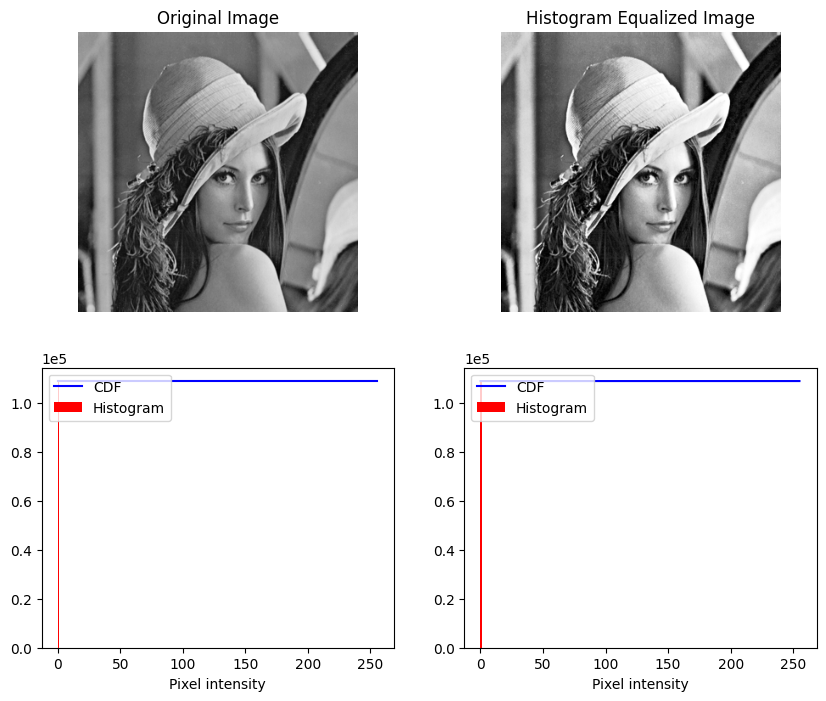

In [ ]:
image = imread('/content/lena.png')  # Load an image
image_gray = rgb2gray(image)  # Convert to grayscale if necessary

# Apply global histogram equalization
image_eq = exposure.equalize_hist(image_gray)

# Plotting original and equalized image and histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plot_image_and_hist(image_gray, axes[:, 0])
plot_image_and_hist(image_eq, axes[:, 1])

axes[0, 0].set_title('Original Image')
axes[0, 1].set_title('Histogram Equalized Image')
plt.show()


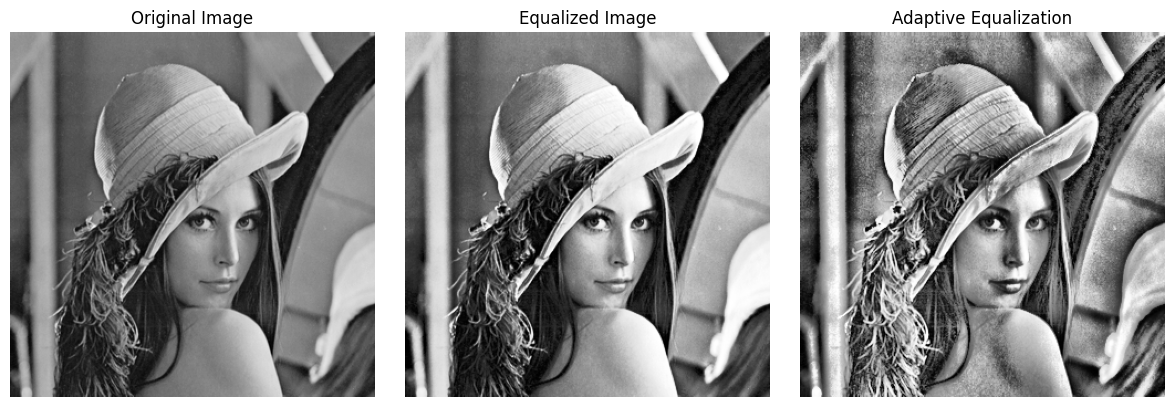

In [ ]:
# Applying Adaptive Histogram Equalization
image_adapteq = exposure.equalize_adapthist(image_gray, clip_limit=0.03)

# Plotting the result
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
axes[0].imshow(image_gray, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(image_eq, cmap=plt.cm.gray)
axes[1].set_title('Equalized Image')
axes[2].imshow(image_adapteq, cmap=plt.cm.gray)
axes[2].set_title('Adaptive Equalization')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()


Histogram Matching

In [ ]:
from skimage import exposure, io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def calculate_cdf(image):
    """Calculate the normalized cumulative distribution function for an image."""
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256], density=True)
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # Normalize to [0,1]
    return cdf_normalized, bins

def match_histograms(c, c_t, image):
    """Match the histogram of an image to the histogram of a target image."""
    # Create an array that represents the mapping from input pixels to target pixels
    pixel_mapping = np.interp(np.linspace(0, 1, 256), c, c_t)
    # Apply the mapping for each pixel in the image
    matched_image = np.interp(image.flatten(), np.linspace(0, 1, 256), pixel_mapping)
    return matched_image.reshape(image.shape)

In [ ]:
# Load images
input_image = io.imread('/content/lena.png')
template_image = io.imread('/content/Kandy flyers-02.jpg')

# Assuming images are RGB, process each channel separately
result_image = np.zeros(input_image.shape, dtype=np.uint8)
for channel in range(3):
    c, _ = calculate_cdf(input_image[..., channel])
    c_t, _ = calculate_cdf(template_image[..., channel])
    result_image[..., channel] = match_histograms(c, c_t, input_image[..., channel])


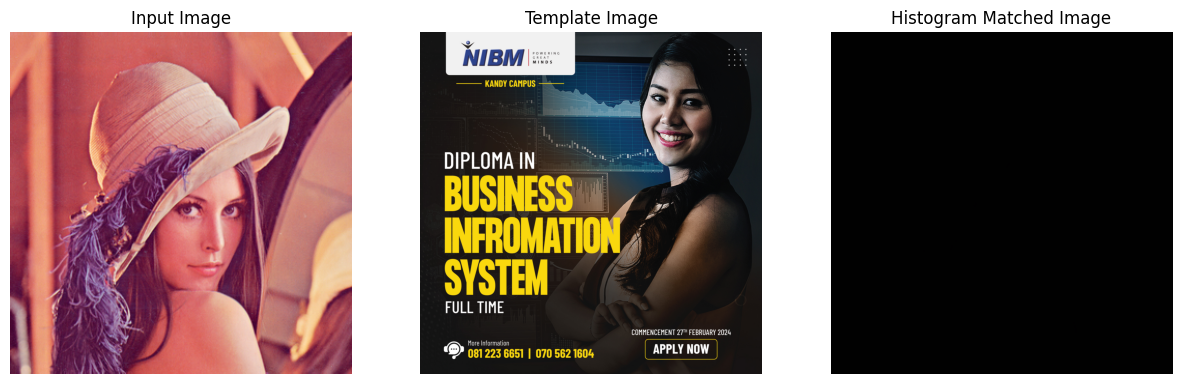

In [ ]:
# Display images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(input_image)
ax[0].set_title('Input Image')
ax[1].imshow(template_image)
ax[1].set_title('Template Image')
ax[2].imshow(result_image)
ax[2].set_title('Histogram Matched Image')
for a in ax:
    a.axis('off')
plt.show()
